In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

plt.style.use("seaborn-v0_8")

# 2. Load Data
# Fetch live data with yfinance
df = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Preview dataset
df.head()


/tmp/ipython-input-2045394880.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2018-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.381004,40.390383,39.677748,39.888727,102223600
2018-01-03,40.373962,40.917816,40.310672,40.444289,118071600
2018-01-04,40.561504,40.664649,40.338807,40.446638,89738400
2018-01-05,41.023315,41.110049,40.566199,40.657622,94640000
2018-01-08,40.870930,41.166296,40.772471,40.870930,82271200


In [11]:
# 3. Data Overview

print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())

# Check for duplicate rows
print("\nDuplicates:", df.duplicated().sum())


Shape of dataset: (1509, 5)

Missing values:
 Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

Summary statistics:
 Price         Close         High          Low         Open        Volume
Ticker         AAPL         AAPL         AAPL         AAPL          AAPL
count   1509.000000  1509.000000  1509.000000  1509.000000  1.509000e+03
mean     107.928932   109.057666   106.687573   107.828880  1.073284e+08
std       50.983470    51.457732    50.455420    50.942456  5.513287e+07
min       33.832443    34.672365    33.787234    34.258351  2.404830e+07
25%       51.287098    52.090893    50.907710    51.424629  7.078370e+07
50%      120.581505   121.836788   119.080916   120.722430  9.296430e+07
75%      150.366409   152.119782   148.366922   150.191824  1.280440e+08
max      196.446823   197.944141   195.346140   196.357582  4.265100e+08

Duplicates: 0


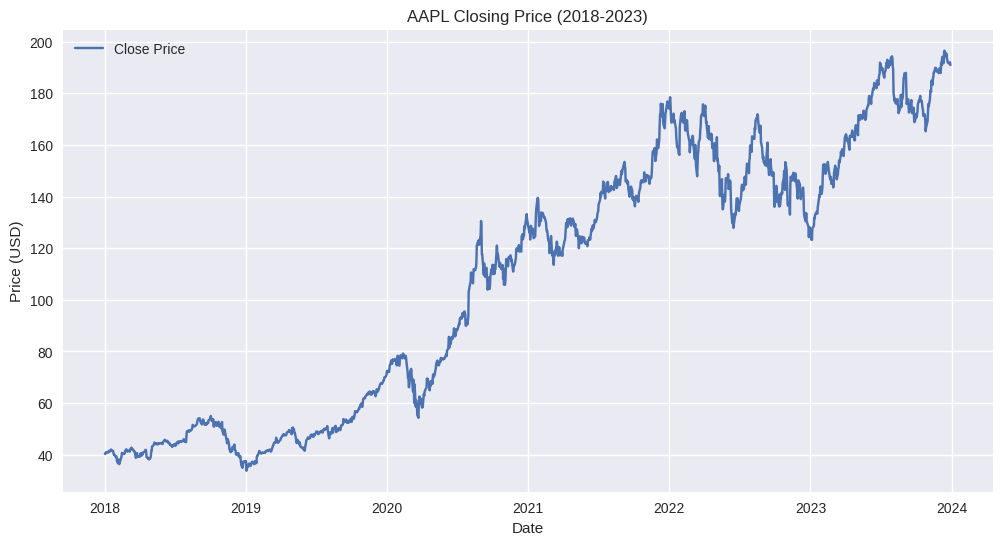

In [12]:
# 4. Visualization - Price Trends

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Close Price")
plt.title("AAPL Closing Price (2018-2023)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


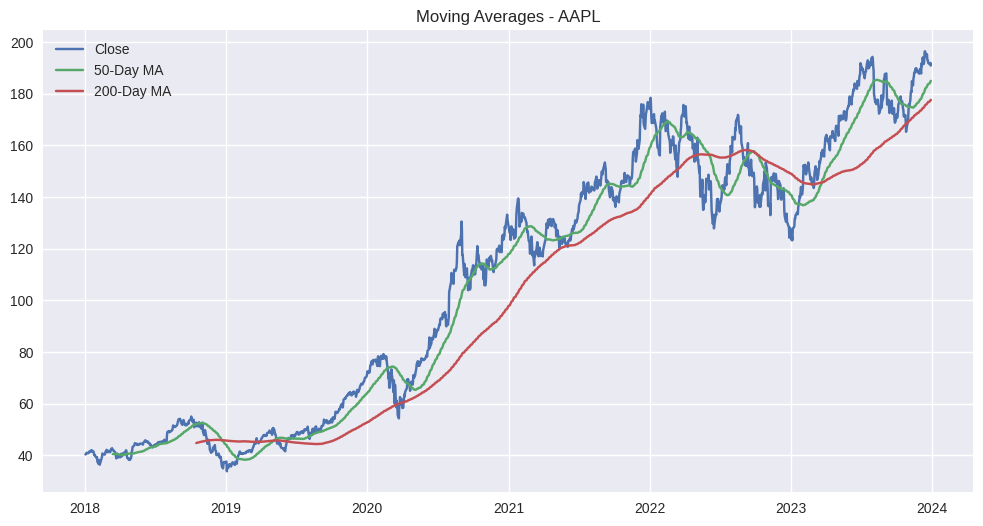

In [13]:
# 5. Moving Averages

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Close")
plt.plot(df['MA50'], label="50-Day MA")
plt.plot(df['MA200'], label="200-Day MA")
plt.title("Moving Averages - AAPL")
plt.legend()
plt.show()


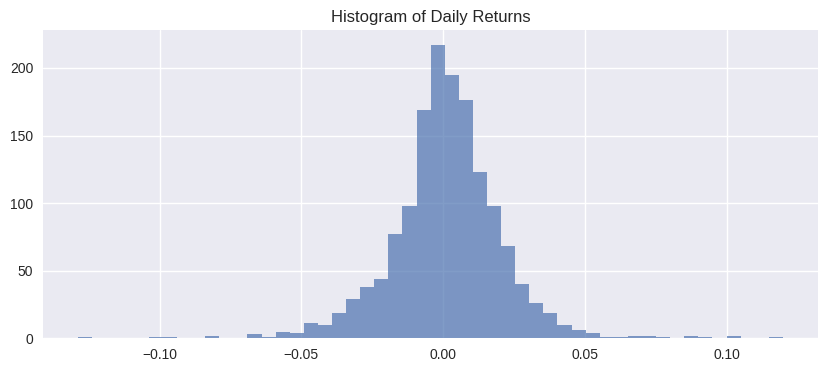

Mean Daily Return: 0.0012297856735446117
Std Dev of Daily Return: 0.019954632670728008


In [14]:
# 6. Daily Returns
df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(10,4))
df['Daily Return'].hist(bins=50, alpha=0.7)
plt.title("Histogram of Daily Returns")
plt.show()

print("Mean Daily Return:", df['Daily Return'].mean())
print("Std Dev of Daily Return:", df['Daily Return'].std())


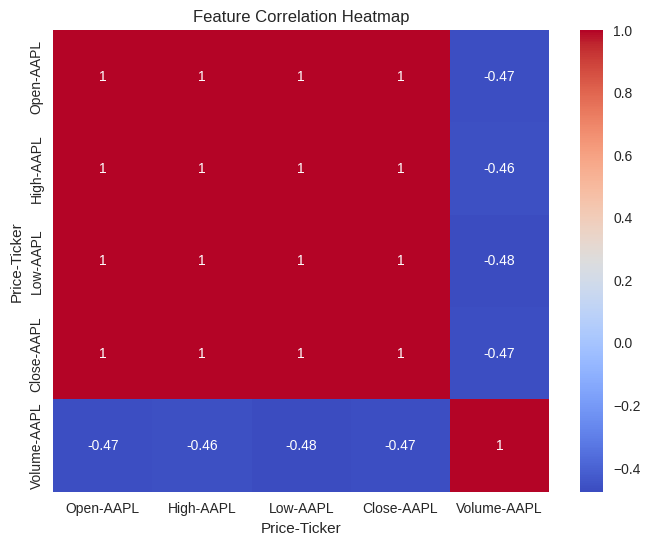

In [15]:
# 7. Correlation Heatmap (OHLC)

plt.figure(figsize=(8,6))
sns.heatmap(df[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
# 8. Stationarity Check (ADF Test)

result = adfuller(df['Close'].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The series is stationary (good for ARIMA)")
else:
    print("The series is non-stationary (differencing required)")


ADF Statistic: -0.511833575442615
p-value: 0.8896864931353651
The series is non-stationary (differencing required)


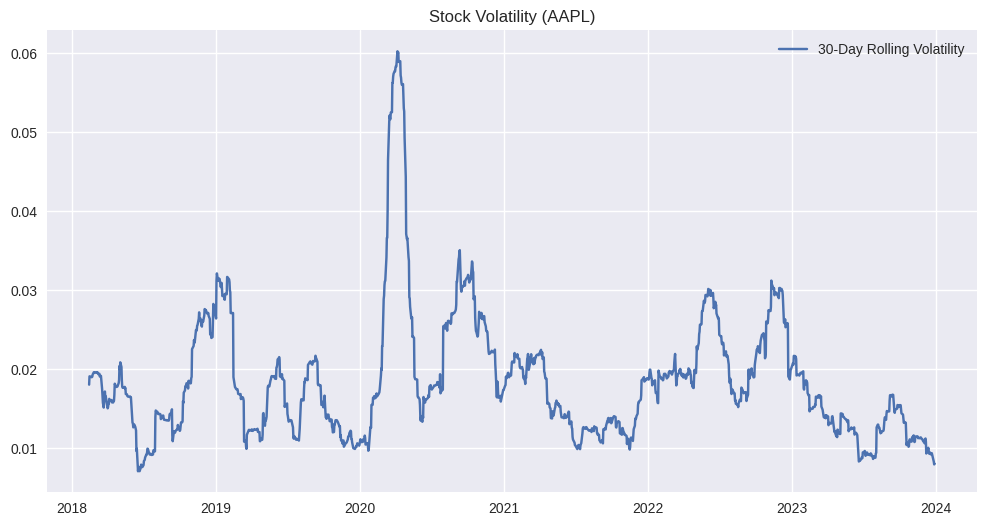

In [17]:
# 9. Volatility (Rolling Std)

df['Volatility'] = df['Daily Return'].rolling(window=30).std()

plt.figure(figsize=(12,6))
plt.plot(df['Volatility'], label="30-Day Rolling Volatility")
plt.title("Stock Volatility (AAPL)")
plt.legend()
plt.show()

